# **Data Import and Setup**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## **Loading the Dataset**

In [ ]:
teams = pd.read_csv("/content/teams.csv")
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [ ]:
teams.shape

(2144, 11)

In [ ]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           2144 non-null   object 
 1   country        2144 non-null   object 
 2   year           2144 non-null   int64  
 3   events         2144 non-null   int64  
 4   athletes       2144 non-null   int64  
 5   age            2144 non-null   float64
 6   height         2144 non-null   float64
 7   weight         2144 non-null   float64
 8   medals         2144 non-null   int64  
 9   prev_medals    2014 non-null   float64
 10  prev_3_medals  2014 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 184.4+ KB


In [ ]:
teams.columns

Index(['team', 'country', 'year', 'events', 'athletes', 'age', 'height',
       'weight', 'medals', 'prev_medals', 'prev_3_medals'],
      dtype='object')

### **Dropping of Columns**

In [ ]:
teams = teams.drop(["events", "height", "weight", "prev_3_medals"], axis=1)

In [ ]:
teams

,team,country,year,athletes,age,medals,prev_medals
0,AFG,Afghanistan,1964,8,22.0,0,0.0
1,AFG,Afghanistan,1968,5,23.2,0,0.0
2,AFG,Afghanistan,1972,8,29.0,0,0.0
3,AFG,Afghanistan,1980,11,23.6,0,0.0
4,AFG,Afghanistan,2004,5,18.6,0,0.0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0,0.0
2140,ZIM,Zimbabwe,2004,14,25.1,3,0.0
2141,ZIM,Zimbabwe,2008,16,26.1,4,3.0
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0


### **Correlation Analysis**

In [ ]:
correlation_with_medals = teams.corr(numeric_only="true")["medals"]
print(correlation_with_medals)

year          -0.021603
athletes       0.840817
age            0.025096
medals         1.000000
prev_medals    0.920048
Name: medals, dtype: float64


### **Scatter Plot of Athletes vs. Medals with Regression Line:**

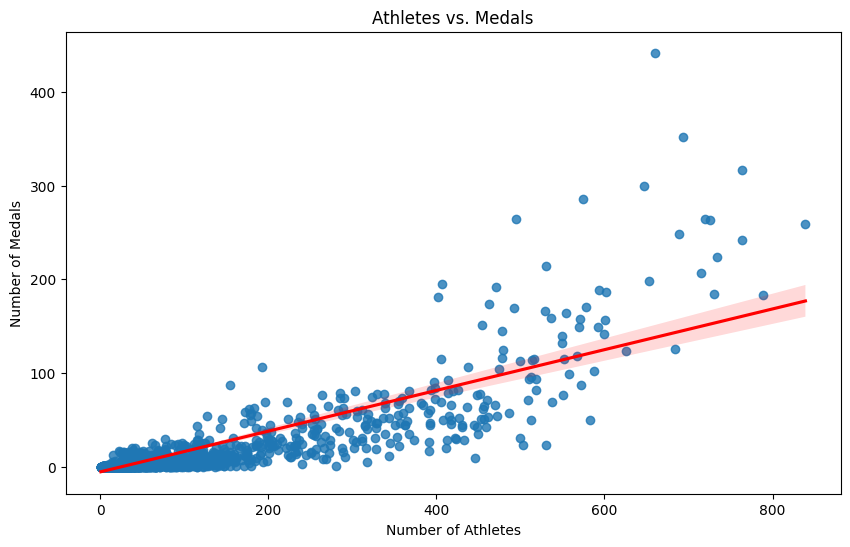

In [55]:
plt.figure(figsize=(10, 6))
sns.regplot(x="athletes", y="medals", data=teams, line_kws={"color": "red"})
plt.title('Athletes vs. Medals')
plt.xlabel('Number of Athletes')
plt.ylabel('Number of Medals')
plt.show()

### **Scatter plot of Age vs Medals with regression line**

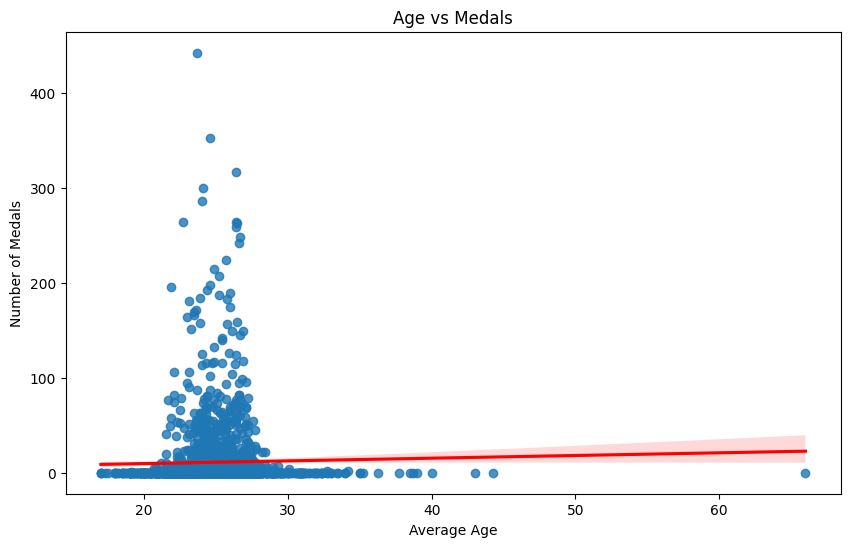

In [54]:
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='medals', data=teams, line_kws={"color": "red"})
plt.title('Age vs Medals')
plt.xlabel('Average Age')
plt.ylabel('Number of Medals')
plt.show()

<Axes: ylabel='Frequency'>

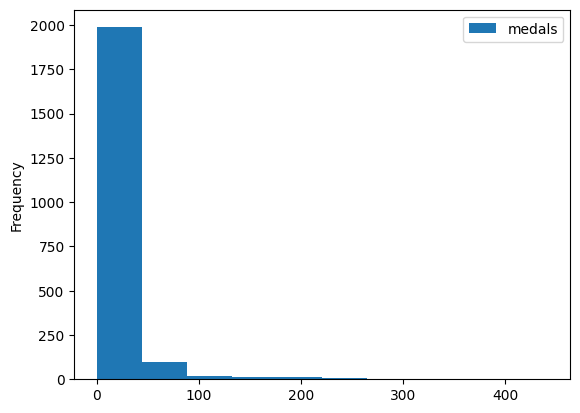

In [ ]:
teams.plot.hist(y = "medals")

In [ ]:
teams.isnull().sum()

,0
team,0
country,0
year,0
athletes,0
age,0
medals,0
prev_medals,130


In [ ]:
teams.dropna(inplace=True)
teams

,team,country,year,athletes,age,medals,prev_medals
0,AFG,Afghanistan,1964,8,22.0,0,0.0
1,AFG,Afghanistan,1968,5,23.2,0,0.0
2,AFG,Afghanistan,1972,8,29.0,0,0.0
3,AFG,Afghanistan,1980,11,23.6,0,0.0
4,AFG,Afghanistan,2004,5,18.6,0,0.0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0,0.0
2140,ZIM,Zimbabwe,2004,14,25.1,3,0.0
2141,ZIM,Zimbabwe,2008,16,26.1,4,3.0
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0


### **Distribution of Medals**

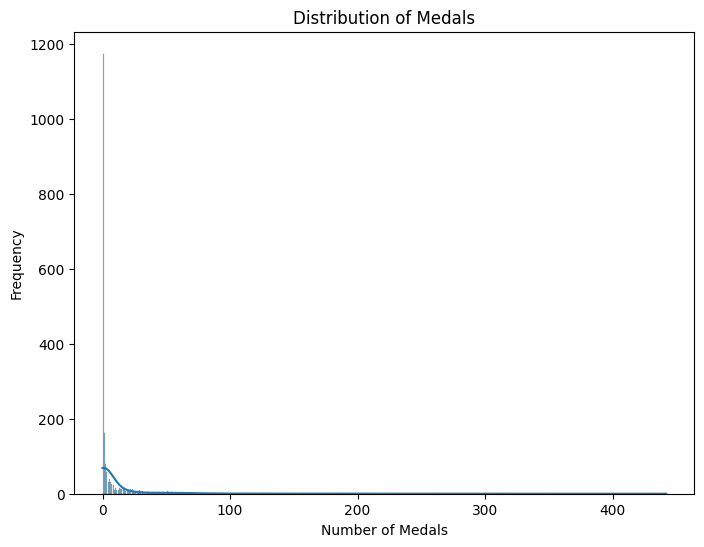

In [48]:
plt.figure(figsize=(8, 6))
sns.histplot(teams['medals'], kde=True)
plt.title('Distribution of Medals')
plt.xlabel('Number of Medals')
plt.ylabel('Frequency')
plt.show()

### **Dataset Splitting**

In [ ]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [ ]:
train.shape

(1609, 7)

In [ ]:
test.shape

(405, 7)

In [ ]:
reg = LinearRegression()

In [ ]:
predictors = ["athletes", "prev_medals"]
target = "medals"

In [ ]:
reg.fit(train[predictors], train[target])


LinearRegression()

### **Predictions and Adjustments**

In [ ]:
predictions = reg.predict(test[predictors])

In [ ]:
predictions

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

In [ ]:
test["prediction"] = predictions
test

,team,country,year,athletes,age,medals,prev_medals,prediction
6,AFG,Afghanistan,2012,6,24.8,1,1.0,-0.961221
7,AFG,Afghanistan,2016,3,24.7,0,1.0,-1.176333
24,ALB,Albania,2012,10,25.7,0,0.0,-1.425032
25,ALB,Albania,2016,6,23.7,0,0.0,-1.711847
37,ALG,Algeria,2012,39,24.8,1,2.0,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0,0.0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0,0.0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0,0.0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0,1.505767


### **Comparison of Actual vs. Predicted Medals:**

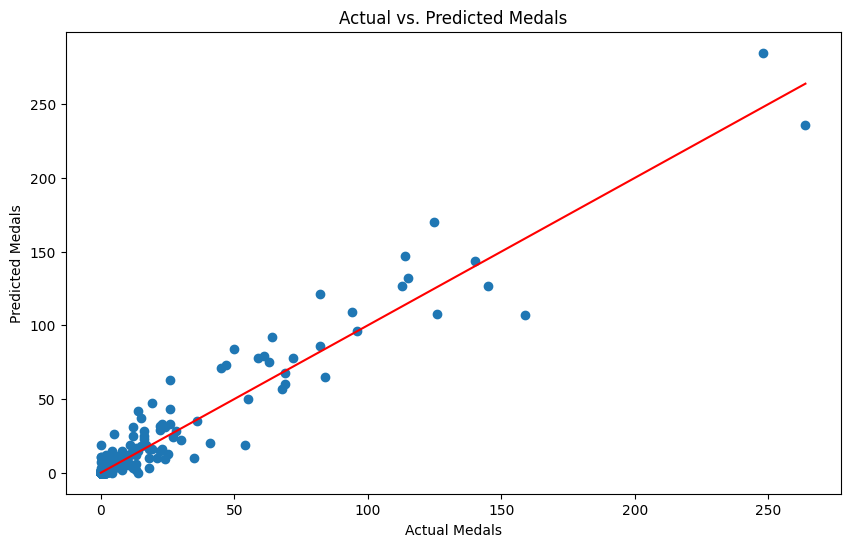

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(test["medals"], test["prediction"])
plt.plot([min(test["medals"]), max(test["medals"])], [min(test["medals"]), max(test["medals"])], color='red')  # Add a diagonal line
plt.xlabel("Actual Medals")
plt.ylabel("Predicted Medals")
plt.title("Actual vs. Predicted Medals")
plt.show()


In [ ]:
test.loc[test["prediction"] < 0, "prediction"] = 0
test

,team,country,year,athletes,age,medals,prev_medals,prediction
6,AFG,Afghanistan,2012,6,24.8,1,1.0,0.000000
7,AFG,Afghanistan,2016,3,24.7,0,1.0,0.000000
24,ALB,Albania,2012,10,25.7,0,0.0,0.000000
25,ALB,Albania,2016,6,23.7,0,0.0,0.000000
37,ALG,Algeria,2012,39,24.8,1,2.0,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0,0.0,0.000000
2131,ZAM,Zambia,2012,7,22.6,0,0.0,0.000000
2132,ZAM,Zambia,2016,7,24.1,0,0.0,0.000000
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0,1.505767


In [ ]:
test["prediction"] = test["prediction"].round()
test

,team,country,year,athletes,age,medals,prev_medals,prediction
6,AFG,Afghanistan,2012,6,24.8,1,1.0,0.0
7,AFG,Afghanistan,2016,3,24.7,0,1.0,0.0
24,ALB,Albania,2012,10,25.7,0,0.0,0.0
25,ALB,Albania,2016,6,23.7,0,0.0,0.0
37,ALG,Algeria,2012,39,24.8,1,2.0,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0,0.0,0.0
2131,ZAM,Zambia,2012,7,22.6,0,0.0,0.0
2132,ZAM,Zambia,2016,7,24.1,0,0.0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0,2.0


### **Error Analysis**

In [ ]:
error = mean_absolute_error(test[target], test["prediction"])
error

3.2987654320987656

In [ ]:
error1 = mean_squared_error(test[target], test["prediction"])
error1

65.42222222222222

In [ ]:
error2 = r2_score(test[target], test["prediction"])
error2

0.9210409414691608

In [ ]:
teams.describe()["medals"]

,medals
count,2014.000000
mean,10.990070
std,33.627528
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,442.000000


### **Summary Statistics**

In [ ]:
test[test["team"] == "USA"]

,team,country,year,athletes,age,medals,prev_medals,prediction
2053,USA,United States,2012,689,26.7,248,317.0,285.0
2054,USA,United States,2016,719,26.4,264,248.0,236.0


In [ ]:
test[test["team"] == "GER"]

,team,country,year,athletes,age,medals,prev_medals,prediction
755,GER,Germany,2012,510,26.6,94,99.0,109.0
756,GER,Germany,2016,536,26.5,159,94.0,107.0


In [ ]:
test[test["team"] == "ARG"]

,team,country,year,athletes,age,medals,prev_medals,prediction
80,ARG,Argentina,2012,148,27.4,19,51.0,47.0
81,ARG,Argentina,2016,232,27.5,22,19.0,29.0


In [62]:
errors = (test["medals"] - predictions).abs()
errors

,medals
6,1.961221
7,1.176333
24,1.425032
25,1.711847
37,1.155629
...,...
2111,1.926958
2131,1.640143
2132,1.640143
2142,1.505767


In [ ]:
errors = (test["medals"] - test["prediction"]).abs()

In [ ]:
errors

,0
6,1.0
7,0.0
24,0.0
25,0.0
37,1.0
...,...
2111,0.0
2131,0.0
2132,0.0
2142,2.0


### **Groups errors by team**

In [ ]:
error_by_team = errors.groupby(test["team"]).mean()
error_by_team

,0
team,
AFG,0.5
ALB,0.0
ALG,1.5
AND,0.0
ANG,0.0
...,...
VIE,1.0
VIN,0.0
YEM,0.0


### **Summarizes medal counts by team**

In [ ]:
medals = teams.groupby("team")["medals"].sum()
medals

,medals
team,
AFG,2
AHO,1
ALB,0
ALG,17
AND,0
...,...
YAR,0
YEM,0
YUG,288
